# AVIATION ACCIDENTS DATA ANALYSIS

## Introduction

The aim of this project is to analyse the aviation accidents to be able to decide on the lowest risk aircrafts that the business can venture in.

## Business Understanding

The company is expanding in to new industries to diversify its portfolio. They are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. 
The purpose of this analysis is to determine which aircraft are the lowest risk for the company start the new business venture with.

### Objectives:
1. To clean up the data and ensure it is valid for our analysis.
2. To identify the trends in the aircraft accidents.
3. To analyse the data and be able to identify the best aircraft the business can purchase for the new venture.

## Data Understanding

The dataset is from the National Transportation Safety Board in Kaggle that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.

### Data Wrangling

#### Importing the data

In [4]:
## Importing the libraries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Ensuring the plots are displayed within the notebook.
%matplotlib inline
## Importing the data
df = pd.read_csv('AviationData.csv')
## Checking the first five rows of the data
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_31080\2133710173.py:8: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
## Performing a summary meta data on the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

From the output above;
1.The data frame contains 88889 rows and 31 columns.
2.There are a number of null values.
3.The data type of each column is identified.

#### Consistency

The data could be having duplicated entries hence the need to confirm the same and drop the duplicate entries if there.

In [106]:
## Checking for any duplicates in the data frame
df.duplicated().value_counts()
## Confirming the number of rows and columns
df.shape

(88889, 31)

From the output above there are no duplicates in the data frame.

#### Completeness

The data needs to be investigated for presence of any Null values that could affect our analysis.

In [7]:
##Checking for Null values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

Quite a number of our columns have null values.

The columns with the Nan values seem to have important information for our analysis later hence the need to keep them and not drop the columns.

In [8]:
## Replacing the null values with 0
df = df.fillna(value = 0)

After the null values are replaced with 0, there is need to confirm that indeed the data set has no null values now

In [9]:
## Rechecking for null values
df.isna().sum()

Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

The data has no Null values

#### Uniformity

The data types need to be uniform for each column. There is need to confirm uniformity in a few of the columns that will be important in the anlysis.

In [44]:
## Ensuring the 'Make' column has all the words in lower case for uniformity
df['Make'] = df['Make'].str.lower()


## Exploratory Data Analysis

The data has been confirmed to be valid from the data wrangling process and now the data analysis begins.

#### Univariate Analysis

The purpose of this analysis is to investigate single variables and their behaviour in the data set.

In [69]:
## Getting a full list of the columns of our dataset
columns_list = df.columns.tolist()
columns_list

['Event.Id',
 'Investigation.Type',
 'Accident.Number',
 'Event.Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport.Code',
 'Airport.Name',
 'Injury.Severity',
 'Aircraft.damage',
 'Aircraft.Category',
 'Registration.Number',
 'Make',
 'Model',
 'Amateur.Built',
 'Number.of.Engines',
 'Engine.Type',
 'FAR.Description',
 'Schedule',
 'Purpose.of.flight',
 'Air.carrier',
 'Total.Fatal.Injuries',
 'Total.Serious.Injuries',
 'Total.Minor.Injuries',
 'Total.Uninjured',
 'Weather.Condition',
 'Broad.phase.of.flight',
 'Report.Status',
 'Publication.Date']

From the data set there is need to confirm make of the aircrafts involved in the accidents.
By use of a frequency table , the most common aircrafts make involved in accidents can be identified.

##### Checking the 'Make' Column

First there is need to find out how many different makes of the aircrafts are in our data set.

In [58]:
## Checking unique makes of the aircraft in our data set
unique_make = df['Make'].unique()
## Confirming the length
len(unique_make)

7588

There are 7588 different air craft makes in our dataset that were involved in accidents in that period.

In [65]:
## Checking the frequency on accident occurrences on each aircraft make in the data
frequency_table = df['Make'].value_counts()
## Checking the top 20 aircrafts with highest frequency
top_50 = frequency_table.head(50)

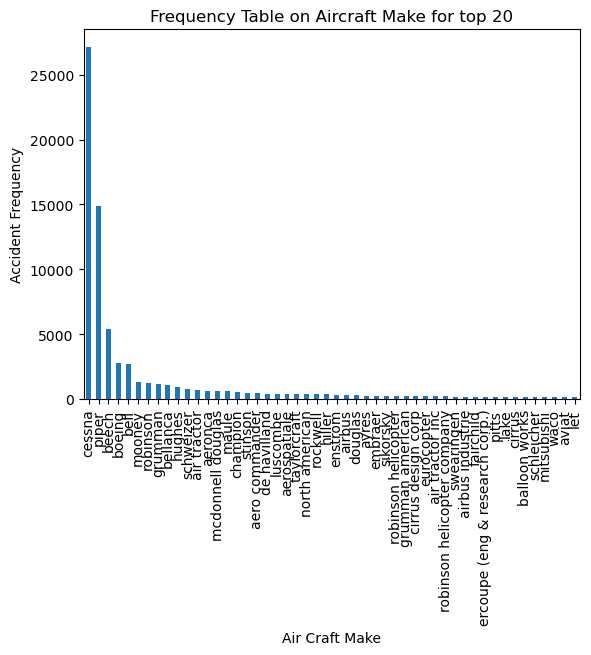

In [66]:
## Plotting a bar graph on the frequency on the top 20
top_50.plot(kind = 'bar')
## Labeling the x and y axis
plt.xlabel('Air Craft Make')
plt.ylabel('Accident Frequency')
## Adding the title to the bar graph
plt.title('Frequency Table on Aircraft Make for top 20')
## Showing the plot
plt.show()

The bar graph shows that;
1. Cessna Make had the highest accidents in that periosd with over 20,000 occurrences
2. Three makes of the aircrafts had occurrences of 5000 and above out of the 88,887 accidents.

In [67]:
##Checking the last 20 aircrafts in frequency
last_50 = frequency_table.tail(50)

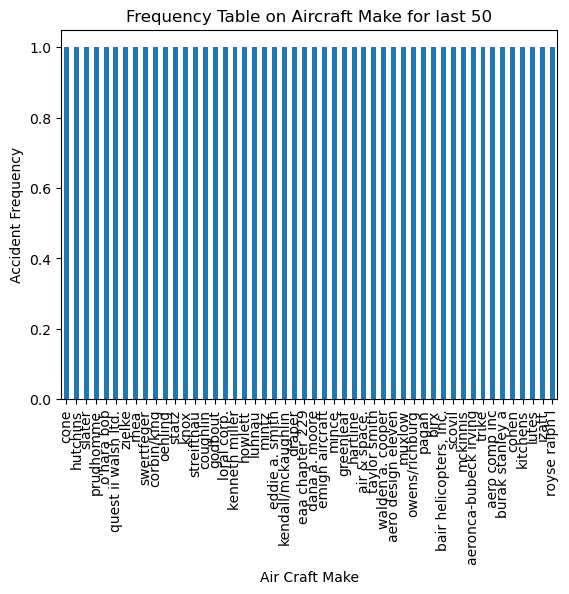

In [68]:
## Plotting a bar graph on the frequency on the last 11
last_50.plot(kind = 'bar')
## Labeling the x and y axis
plt.xlabel('Air Craft Make')
plt.ylabel('Accident Frequency')
## Adding the title to the bar graph
plt.title('Frequency Table on Aircraft Make for last 50')
## Showing the plot
plt.show()

Around 50 and more different makes of the aircrafts had 1 occurrence of accident in the period of the data set.

##### Checking the Injuries,Fatal and Non Injury Columns


In [80]:
## Checking the data type of the Total Fatal Injuries Column
df['Total.Fatal.Injuries'].dtype
## Checking the maximum total fatal injuries
Highest_fatal_injuries = max(df['Total.Fatal.Injuries'])
Highest_fatal_injuries
## Checking the maximum total serious injuries
Highest_serious_injuries = max(df['Total.Serious.Injuries'])
Highest_serious_injuries
## Checking the maximum total minor injuries
Highest_minor_injuries = max(df['Total.Minor.Injuries'])
Highest_minor_injuries
## Checking the maximum total uninjured
Highest_uninjured = max(df['Total.Uninjured'])
Highest_uninjured

699.0

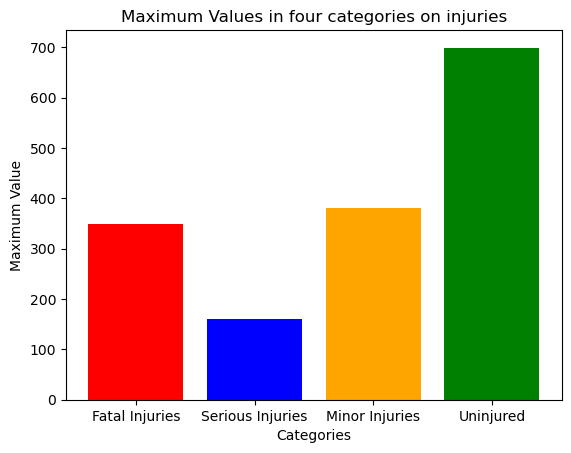

In [89]:
## Creating a plot for the maximum values for the injuries,fatal and uninjured numbers.
Maximum_values =({'Column': ['Fatal Injuries','Serious Injuries','Minor Injuries','Uninjured'], 'Maximum Value': [Highest_fatal_injuries,Highest_serious_injuries,Highest_minor_injuries,Highest_uninjured]})
##
plt.bar(Maximum_values['Column'],Maximum_values['Maximum Value'],color =['Red','Blue','Orange','Green'])
##
plt.xlabel('Categories')
plt.ylabel('Maximum Value')
##
plt.title('Maximum Values in four categories on injuries')
##
plt.show()


#### Bivariate Analysis

The purpose of this analysis to investigate how two variables behave against each other.
Having found the maximum numbers on the injuries, a comparison with the aircraft model will  help us know which aircraft had the highest fatalities,injuries and which aircraft had the highest uninjured people.

In [98]:
## Finding the corresponding aircraft make for the highest number of fatalities
## Finding the row(accident event) with the the highest number of fatalities
fatal_aircraft_incident = df.loc[df['Total.Fatal.Injuries'].idxmax()]
## Finding the corresponding Aircraft make
fatal_aircraft = fatal_aircraft_incident['Make']
fatal_aircraft
tupolev_frequency = frequency_table['tupolev']

The aircraft make 'tupolev' had the highest fatal injuries within the period. It however had only four incidents.

In [102]:
## Finding the corresponding aircraft make for the highest number of serious injuries.
serious_aircraft_incident = df.loc[df['Total.Serious.Injuries'].idxmax()]
## Finding the corresponding Aircraft make
serious_aircraft = serious_aircraft_incident['Make']
serious_aircraft
boeing_frequency = frequency_table['boeing']
boeing_frequency


2745

The aircraft make 'boeing' had the highest serious injuries reported.It had 2745 incidents within the period.

In [103]:
## Finding the corresponding aircraft make for the highest number of minor injuries
minor_aircraft_incident = df.loc[df['Total.Minor.Injuries'].idxmax()]
## Finding the corresponding Aircraft make
minor_aircraft = minor_aircraft_incident['Make']
minor_aircraft


'boeing'

The aircraft make 'boeing' had the highest minor injuries reported.

In [104]:
## Finding the corresponding aircraft make for the highest number of uninjured persons
uninjured_aircraft_incident = df.loc[df['Total.Uninjured'].idxmax()]
## Finding the corresponding Aircraft make
uninjured_aircraft = uninjured_aircraft_incident['Make']
uninjured_aircraft

'boeing'

The aircraft make 'boeing' had the highest uninjured persons.

#### Multi - Variate Analysis
This will investigate more than two variables.To confirm level of risk ,there is need to confirm the relationship between aircraft make,fatal injuries and serious injuries.


In [118]:
## Extracting the columns
df1 = ['Make', 'Total.Fatal.Injuries','Total.Serious.Injuries']
columns_df1 = df[df1]
## Calculating the risk
accident_rates = columns_df1.groupby('Make').size() / len(columns_df1)
injury_rates = columns_df1.groupby('Make')['Total.Serious.Injuries'].sum() / columns_df1.groupby('Make').size()
risk = pd.DataFrame({'Accident_Rate': accident_rates, 'Injury_Rate': injury_rates})
risk
## Risk Ranking
low_risk_aircraft = risk[(risk['Accident_Rate'] < 0.05) & (risk['Injury_Rate'] < 0.01)]
low_risk_aircraft

,Accident_Rate,Injury_Rate
Make,,
107.5 flying corporation,0.000011,0.0
1977 colfer-chan,0.000011,0.0
1st ftr gp,0.000011,0.0
2000 mccoy,0.000011,0.0
2003 nash,0.000011,0.0
...,...,...
zubair s khan,0.000011,0.0
zuber thomas p,0.000011,0.0
zukowski,0.000011,0.0


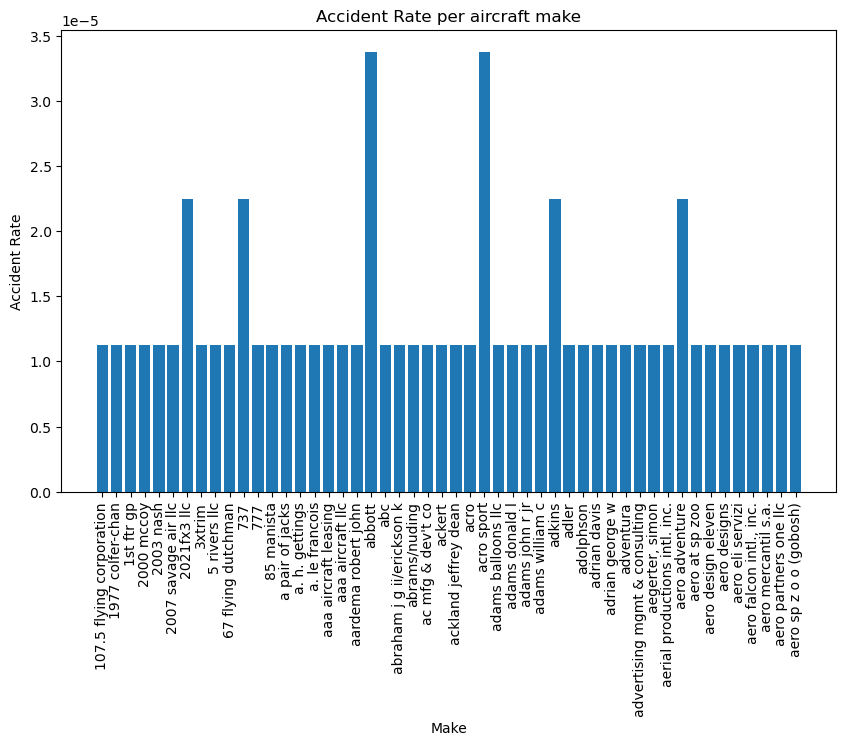

<Figure size 640x480 with 0 Axes>

In [136]:
## Plotting a bar graph for the accident rate for the first 50 rows
plt.figure(figsize=(10,6))
plt.bar(low_risk_aircraft.index[:50], low_risk_aircraft['Accident_Rate'][:50])
## Labeling the x and y axis
plt.xlabel('Make')
plt.ylabel('Accident Rate')
## Rotating the x axix labels to avoid overlapping
plt.xticks(rotation=90)
## Labeling the title
plt.title('Accident Rate per aircraft make')
plt.show()
plt.tight_layout()


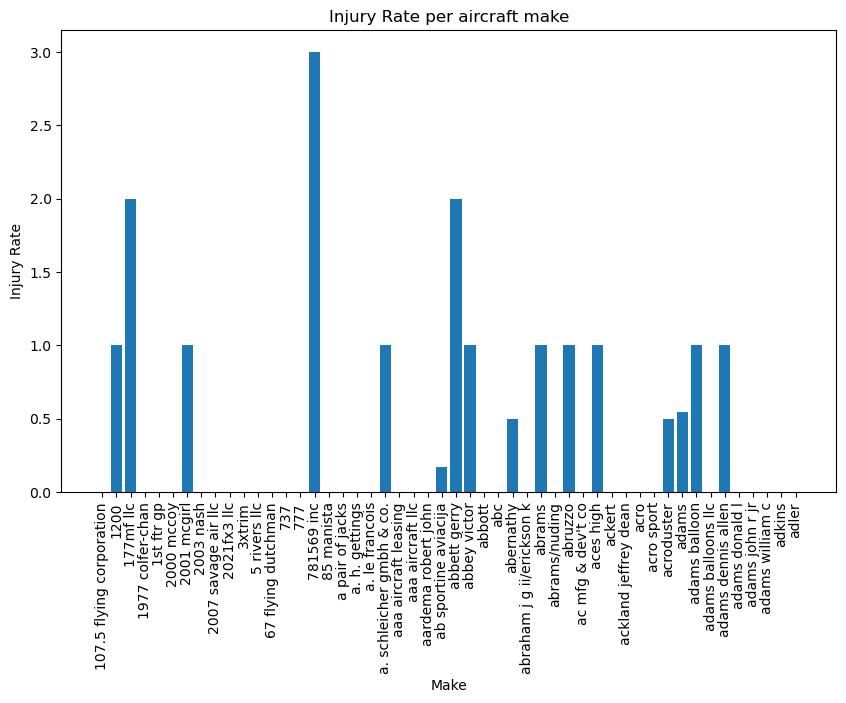

In [138]:
## Plotting a bar graph for the injury rate
plt.figure(figsize=(10,6))
plt.bar(risk.index[:50] ,risk['Injury_Rate'][:50])
## Labeling the x and y axis
plt.xlabel('Make')
plt.ylabel('Injury Rate')
## Rotating the x axis labels by 90 degrees to avoid overlapping
plt.xticks(rotation=90)
## Labeling the title
plt.title('Injury Rate per aircraft make')
plt.show()

## CONCLUSIONS
From the analysis above;
1. Out of the 7588 different aircraft makes,5550 of them are considered low risk on accident rate and injury rate.
2. There were alot of null values which were replaced by 0
3. Aircraft make 'Boeing' had the highest serious injuries

## RECOMMENDATIONS
From the analysis;
The business has a big selection of aircrafts to choose from as more than half of the aircrafts in the dataset are considered low risk.